In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import torch

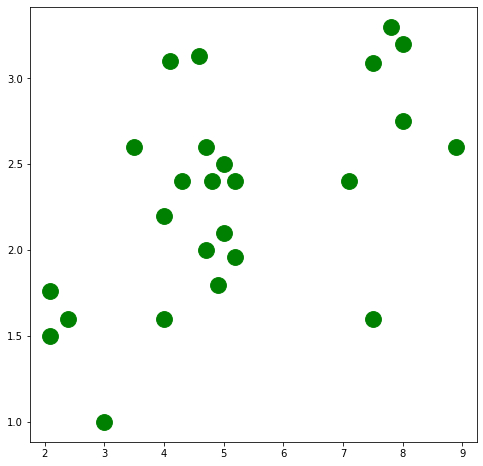

In [5]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.show()

In [7]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

# our neural network has just one x feature and one hidden neuron => shape = [1,1]
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
b1 = torch.rand(hidden_size, output_size, requires_grad=True)

In [8]:
# the strength of the regularization; larger values => larger penalties
alpha = 0.8

In [9]:
for iter in range(1, 5001):

    # no activation function
    y_pred = X_train.mm(w1).add(b1)

    ridge_regularization_penalty = w1.pow(2)

    loss = ((y_pred - Y_train).pow(2).sum()) + (alpha * ridge_regularization_penalty)

    if iter % 500 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad

        w1.grad.zero_()
        b1.grad.zero_()

500 6.148655891418457
1000 6.144215106964111
1500 6.144203186035156
2000 6.144202709197998
2500 6.144202709197998
3000 6.144202709197998
3500 6.144202709197998
4000 6.144202709197998
4500 6.144202709197998
5000 6.144202709197998


In [10]:
# print weights and biases calculated for the model
print('weight: ', w1)
print('bias: ', b1)

weight:  tensor([[0.1735]], requires_grad=True)
bias:  tensor([[1.4123]], requires_grad=True)


In [11]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

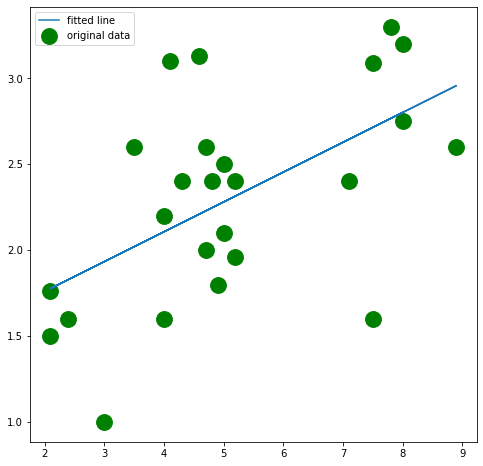

In [12]:
predicted_in_tensor = X_train.mm(w1).add(b1)

predicted = predicted_in_tensor.detach().numpy()

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.plot(x_train, predicted, label='fitted line')
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_reg = ridge_model.fit(x_train, y_train)

print('weight with sklearn: ', ridge_model.coef_)
print('bias with sklearn: ', ridge_model.intercept_)

weight with sklearn:  [[0.17317088]]
bias with sklearn:  [1.4142637]
